In [1]:
import numpy as np
import IPython.display
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import shutil
from scipy.io import wavfile
%matplotlib inline

In [2]:
TEST_WAV = '/home/kolegor/test.wav'

### Spectrogram 

In [3]:
def wav_to_spectrogram(wav_path, save_path, show=False):
    y, sr = librosa.load(wav_path, sr=None)
    
    hop_length = int(0.015 * sr)
    n_fft = int(0.025 * sr)
    print hop_length, n_fft, len(y), sr

    S = librosa.feature.melspectrogram(
        y,
        sr=sr,
        n_mels=128,
        hop_length=hop_length,
        n_fft=n_fft,
    )
    log_S = librosa.power_to_db(S, ref=np.max)
    
    if show:
        plt.figure(figsize=(12,4))
        librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
        plt.title('mel power spectrogram')
        plt.colorbar(format='%+02.0f dB')
        plt.axis('off')
        plt.tight_layout()
    else:
        sizes = np.shape(log_S)
        height = float(sizes[0])
        width = float(sizes[1])
        
        # print height, width
        # print width/height, 1

        fig = plt.figure()
        fig.set_size_inches(width/height, 1, forward=False)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)

        ax.imshow(log_S, cmap='gray', origin='lower')
        plt.savefig(save_path, dpi = height) 
        plt.close()
    
    return log_S, hop_length

330 551 220500 22050
(128, 669)


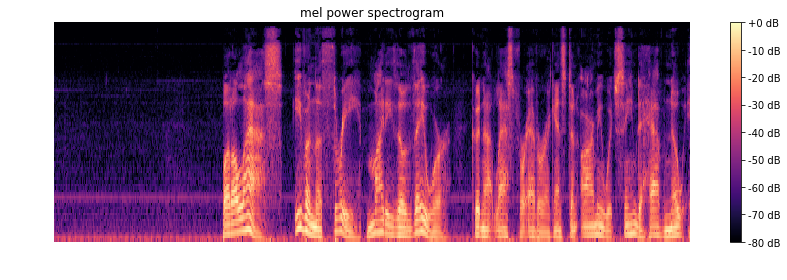

In [4]:
log_S, hop_length = wav_to_spectrogram(TEST_WAV, '/home/kolegor/test.spectrogram.png', show=True)
print log_S.shape

### MFCC

In [21]:
def wav_to_mfcc(wav_path, save_path):
    y, sr = librosa.load(wav_path, sr=None)
    print len(y) / sr
    
    hop_length = int(0.015 * sr)
    n_fft = int(0.025 * sr)
    print hop_length, n_fft, len(y), sr

#     S = librosa.feature.melspectrogram(
#         y,
#         sr=sr,
#         n_mels=128,
#         hop_length=hop_length,
#         n_fft=n_fft,
#     )
#     log_S = librosa.power_to_db(S, ref=np.max)

#     mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

    # librosa
    mfcc = librosa.feature.mfcc(
        y=y,
        sr=sr,
        n_fft=n_fft,
        n_mfcc=13,
        n_mels=128,
        hop_length=hop_length,
        fmin=50,
        fmax=8000
    )

    # Let's pad on the first and second deltas while we're at it
    delta_mfcc  = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)

    # How do they look?  We'll show each in its own subplot
    plt.figure(figsize=(12, 6))

    plt.subplot(3,1,1)
    librosa.display.specshow(mfcc)
    plt.ylabel('MFCC')
    plt.colorbar()

    plt.subplot(3,1,2)
    librosa.display.specshow(delta_mfcc)
    plt.ylabel('MFCC-$\Delta$')
    plt.colorbar()

    plt.subplot(3,1,3)
    librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
    plt.ylabel('MFCC-$\Delta^2$')
    plt.colorbar()

    plt.tight_layout()

    # For future use, we'll stack these together into one matrix
    M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])
    print M.shape

    np.savetxt(save_path, M)
    return M

10
330 551 220500 22050
(39, 669)


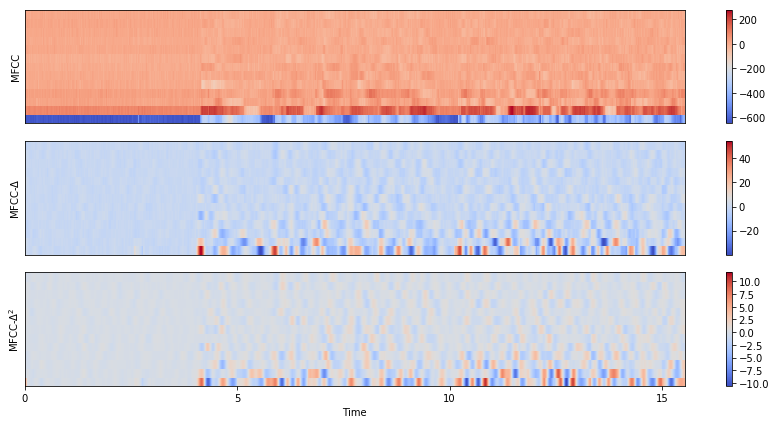

In [22]:
qwe = wav_to_mfcc('/home/kolegor/test.wav', '/home/kolegor/mfcc.txt')

In [31]:
qwe.shape

(39, 669)

In [34]:
np.vstack([qwe]).shape

(39, 669)

In [36]:
int(False)

0